In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble  import RandomForestRegressor
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

import multiprocessing
import xgboost as xgb

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import multiprocessing
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100)


In [4]:
path = "/Users/rafa/Desktop/Project/Data/FM 2023.csv"
df_original = pd.read_csv(path)

In [5]:
df = df_original.copy()

In [59]:
#count = (df["Values"] == 347975206).sum()
#df.drop(df[df["Values"] == 347975206].index, inplace=True)

In [60]:
#overcharged_players = df.loc[df["Values"] == 347975206]

In [6]:
count = (df["Values"] >= 50000000).sum()
df.drop(df[df["Values"] >= 500000006].index, inplace=True)


In [7]:
df_predict_og = df_original.loc[df_original["Values"] > 50000000]
df_predict = df_predict_og



In [8]:
count = (df["Values"] <= 50000).sum()
count

164

In [9]:
df.drop(df[df["Values"] <= 50000].index, inplace=True)


In [65]:
df_original.iloc[2,:]

Name                                   Robert Lewandowski
Position                                                S
Age                                                    33
ca                                                    186
pa                                                    190
Nationality                                        Poland
Club                                            Barcelona
Corners                                                 3
Crossing                                                8
Dribbling                                              13
Finishing                                              19
First Touch                                            18
Free Kick Taking                                       15
Heading                                                17
Long Shots                                             12
Long Throws                                             3
Marking                                                 7
Passing       

In [10]:
df.columns

Index(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality', 'Club', 'Corners',
       'Crossing', 'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking',
       'Heading', 'Long Shots', 'Long Throws', 'Marking', 'Passing',
       'Penalty Taking', 'Tackling', 'Technique', 'Aggressiion',
       'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Vision',
       'Decision', 'Determination', 'Flair', 'Leadership', 'Off The Ball',
       'Position.1', 'Teamwork', 'Work Rate', 'Acceleration', 'Agility',
       'Balance', 'Jumping Reach', 'Natural Fitness', 'Pace', 'Stamina',
       'Strength', 'Stability', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'One On Ones', 'Reflexes',
       'Rushing Out', 'Punching', 'Throwing', 'Adaptation', 'Ambition',
       'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 

In [11]:
df.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)

In [12]:
df_predict.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)

/var/folders/dp/sb0zbjrn4y70c9_f08rwfmx00000gn/T/ipykernel_7975/1369094623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)


In [13]:
df = pd.DataFrame(df)

columns_to_check = {
    "GK", "DL", "DC", "DR", "WBL", "WBR", "DM", "ML", "MC", "MR", "AML", "AMC", "AMR", "ST"
}

def find_column_name(row):
    for col_name in columns_to_check:
        if row[col_name] == 20:
            return col_name
    return None

df['Best_Position'] = df.apply(find_column_name, axis=1)


In [14]:
df_predict = pd.DataFrame(df_predict)

columns_to_check = {
    "GK", "DL", "DC", "DR", "WBL", "WBR", "DM", "ML", "MC", "MR", "AML", "AMC", "AMR", "ST"
}

def find_column_name(row):
    for col_name in columns_to_check:
        if row[col_name] == 20:
            return col_name
    return None

df_predict['Best_Position'] = df_predict.apply(find_column_name, axis=1)

Cleaning

In [15]:
amr_df = df[(df["Best_Position"] == "AMC")]
amr_df = amr_df.reset_index(drop=True)
amr_df

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Kevin De Bruyne,M/AM RLC,31,189,189,Manchester City,14,19,15,16,16,17,6,17,7,9,18,16,9,18,12,14,13,15,15,20,18,17,16,13,14,11,14,15,15,13,14,10,16,14,17,13,15,6,15,7,14,1,3,1,3,3,3,3,3,3,2,1,13,17,13,14,11,18,16,13,1,1,1,1,1,1,12,15,20,15,14,20,14,12,181,68,16,20,347975206,18004457,AMC
1,Bernardo Silva,M/AM RC,27,176,180,Manchester City,14,15,17,15,17,13,10,13,2,12,17,13,8,18,13,16,15,16,15,17,15,16,17,12,17,13,16,20,15,19,16,7,17,14,17,9,16,10,16,6,13,2,2,1,3,2,1,1,1,2,2,2,15,17,14,11,13,17,12,8,1,1,1,1,1,1,1,12,20,16,12,20,19,9,173,64,20,8,347975206,55041632,AMC
2,Thomas Müller,AM RC,32,171,174,FC Bayern München,11,17,11,13,13,7,14,10,8,9,16,13,11,13,17,20,13,16,16,18,16,18,13,17,20,11,20,17,12,12,13,13,20,14,19,11,16,9,17,2,18,2,3,2,2,1,1,1,1,3,1,1,10,17,10,20,19,16,10,10,1,1,1,1,1,1,10,10,14,15,11,20,18,15,185,76,13,20,347975206,35011448,AMC
3,Kai Havertz,AM/S C,23,167,180,Chelsea,11,12,14,16,18,11,13,11,8,7,14,12,10,17,11,15,11,17,10,17,16,10,15,7,17,10,15,13,13,13,13,14,16,17,15,13,13,6,16,4,16,2,2,3,1,3,3,3,2,3,2,3,12,14,5,12,16,15,15,19,1,1,1,1,1,1,10,12,14,14,12,20,14,19,186,77,20,10,305612129,91151081,AMC
4,Jack Grealish,M/AM RLC,26,166,175,Manchester City,13,16,17,14,15,11,11,13,3,6,14,12,9,16,11,13,14,14,11,16,13,14,16,12,13,11,14,15,15,15,14,7,15,15,14,14,14,13,14,12,9,3,1,1,1,3,2,2,4,3,1,1,12,16,12,15,16,13,6,10,1,1,1,1,1,1,1,18,14,16,20,20,16,12,175,82,15,20,288514966,28067800,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,Archie Stevens,AM RLC,16,68,-8,Rangers,6,6,8,7,14,4,7,6,7,7,8,4,6,10,5,9,7,8,7,10,12,17,15,7,11,8,11,13,10,9,8,9,14,10,11,9,20,11,9,5,9,3,1,1,2,2,1,2,1,3,3,3,16,13,5,11,10,11,11,18,1,1,1,1,1,1,1,11,14,13,18,20,17,12,188,0,10,20,8871048,2000183425,AMC
775,Adam Berry,AM LC,16,66,-75,Manchester UFC,10,8,11,9,12,11,1,10,1,1,12,2,2,12,9,7,7,8,5,10,5,4,18,4,8,3,7,9,11,11,9,8,14,10,8,5,6,6,16,6,15,2,1,3,3,2,2,2,1,1,3,1,12,9,8,11,10,10,11,10,1,1,1,1,1,1,1,14,15,10,16,20,12,1,182,0,13,20,9678350,2000190307,AMC
776,Nevio Di Giusto,AM C,17,65,-75,FC Zürich,5,2,6,7,13,3,7,7,1,5,10,6,6,13,10,9,5,9,3,13,13,14,13,4,10,5,12,7,7,8,6,2,14,7,7,4,10,7,7,5,13,3,4,1,2,3,1,4,1,3,4,1,8,11,4,10,9,12,9,10,1,1,1,1,1,1,1,1,15,1,1,20,1,15,162,0,15,20,2977776,2000116928,AMC
777,Logan Briggs,M/AM RLC,17,60,-75,Leicester City,3,6,9,4,12,4,4,4,1,5,12,1,6,7,8,7,2,9,5,12,12,3,14,2,10,5,6,9,12,12,5,3,14,12,8,6,6,7,8,12,15,1,1,1,3,1,2,3,2,1,1,2,19,12,6,13,11,11,12,19,1,1,1,1,1,1,1,1,18,1,15,20,15,1,174,0,8,20,8861769,2000177580,AMC


In [16]:
amr_df_predict = df_predict[(df_predict["Best_Position"] == "AMC")]
amr_df_predict = amr_df_predict.reset_index(drop=True)
amr_df_predict

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Kevin De Bruyne,M/AM RLC,31,189,189,Manchester City,14,19,15,16,16,17,6,17,7,9,18,16,9,18,12,14,13,15,15,20,18,17,16,13,14,11,14,15,15,13,14,10,16,14,17,13,15,6,15,7,14,1,3,1,3,3,3,3,3,3,2,1,13,17,13,14,11,18,16,13,1,1,1,1,1,1,12,15,20,15,14,20,14,12,181,68,16,20,347975206,18004457,AMC
1,Bernardo Silva,M/AM RC,27,176,180,Manchester City,14,15,17,15,17,13,10,13,2,12,17,13,8,18,13,16,15,16,15,17,15,16,17,12,17,13,16,20,15,19,16,7,17,14,17,9,16,10,16,6,13,2,2,1,3,2,1,1,1,2,2,2,15,17,14,11,13,17,12,8,1,1,1,1,1,1,1,12,20,16,12,20,19,9,173,64,20,8,347975206,55041632,AMC
2,Thomas Müller,AM RC,32,171,174,FC Bayern München,11,17,11,13,13,7,14,10,8,9,16,13,11,13,17,20,13,16,16,18,16,18,13,17,20,11,20,17,12,12,13,13,20,14,19,11,16,9,17,2,18,2,3,2,2,1,1,1,1,3,1,1,10,17,10,20,19,16,10,10,1,1,1,1,1,1,10,10,14,15,11,20,18,15,185,76,13,20,347975206,35011448,AMC
3,Kai Havertz,AM/S C,23,167,180,Chelsea,11,12,14,16,18,11,13,11,8,7,14,12,10,17,11,15,11,17,10,17,16,10,15,7,17,10,15,13,13,13,13,14,16,17,15,13,13,6,16,4,16,2,2,3,1,3,3,3,2,3,2,3,12,14,5,12,16,15,15,19,1,1,1,1,1,1,10,12,14,14,12,20,14,19,186,77,20,10,305612129,91151081,AMC
4,Jack Grealish,M/AM RLC,26,166,175,Manchester City,13,16,17,14,15,11,11,13,3,6,14,12,9,16,11,13,14,14,11,16,13,14,16,12,13,11,14,15,15,15,14,7,15,15,14,14,14,13,14,12,9,3,1,1,1,3,2,2,4,3,1,1,12,16,12,15,16,13,6,10,1,1,1,1,1,1,1,18,14,16,20,20,16,12,175,82,15,20,288514966,28067800,AMC
5,Bruno Fernandes,M/AM C,27,166,174,Manchester UFC,16,16,11,15,17,16,10,16,4,3,17,19,8,17,18,16,17,15,14,18,10,17,17,17,17,6,15,15,13,15,13,9,18,14,19,10,12,13,13,3,15,1,1,2,3,3,3,1,1,3,1,1,18,15,5,13,14,17,6,7,1,1,1,1,1,1,1,10,16,10,12,20,14,10,179,69,13,20,265261481,43124203,AMC
6,Mason Mount,AM RLC,23,165,170,Chelsea,14,12,11,14,15,14,9,12,5,7,15,15,11,15,14,14,15,15,12,12,16,18,13,12,17,14,18,20,15,13,10,9,15,15,20,11,12,6,14,8,12,1,3,2,2,1,3,4,3,2,3,3,16,18,6,13,14,16,16,17,1,1,1,1,1,1,14,1,15,1,16,20,15,1,178,70,12,20,126331239,28103590,AMC
7,Phil Foden,AM RLC,22,163,180,Manchester City,13,13,17,14,17,13,8,12,5,8,17,12,8,17,7,14,13,15,15,16,14,14,16,8,16,9,14,16,15,17,15,7,14,16,15,9,15,6,16,4,13,2,3,2,2,1,2,1,3,2,1,3,12,15,12,13,12,14,14,16,1,1,1,1,1,1,1,1,14,1,20,20,17,14,171,64,20,9,147976457,28108494,AMC
8,Martin Ødegaard,M/AM C,23,160,178,Arsenal,14,14,16,12,17,15,9,13,7,10,16,10,8,17,7,18,10,15,12,17,16,15,16,14,16,9,17,14,14,16,15,9,13,13,15,11,11,4,12,7,13,1,1,3,2,1,3,1,1,3,1,2,13,16,6,12,14,18,13,14,1,1,1,1,1,1,13,10,18,13,10,20,14,8,178,68,20,10,272952661,53095137,AMC
9,Pedri,M/AM RLC,19,159,176,Barcelona,9,14,17,11,18,9,7,11,6,6,17,11,9,17,11,17,11,16,15,18,16,14,18,9,13,9,13,15,14,15,13,8,16,13,16,9,15,5,13,5,15,1,1,2,1,2,3,2,2,4,2,3,12,14,3,14,13,15,15,17,1,1,1,1,1,1,1,12,20,14,15,20,16,5,174,65,10,20,96009385,67293495,AMC


Keep Attibutes


In [17]:
AMR_detailed_features = ['Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
        'diversity']

In [71]:
amr_df


,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Paulo Dybala,AM/S RC,28,160,177,Associazione Sportiva Roma,16,15,18,15,18,17,13,17,4,4,17,16,4,19,9,16,10,12,11,17,14,13,17,11,14,4,14,12,14,18,18,7,10,12,12,12,13,5,11,16,13,1,2,3,3,3,3,3,2,3,1,3,14,14,12,9,9,11,13,15,1,1,1,1,1,1,1,1,1,1,12,20,15,20,177,79,20,10,20000000,14044150,AMC
1,Pablo Sarabia,AM RLC,30,154,156,Paris Saint-Germain,15,15,15,15,17,15,7,13,5,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,9,15,10,15,2,1,1,1,2,1,2,2,3,4,1,7,12,10,10,12,14,14,10,1,1,1,1,10,1,1,15,13,15,17,20,19,1,174,70,20,10,36552285,67045428,AMC
2,Dejan Kulusevski,M/AM RC,22,153,171,Juventus,11,14,16,13,15,9,7,11,4,4,17,11,7,16,7,15,8,13,12,16,16,15,15,6,14,6,14,14,13,14,17,12,14,14,16,15,14,11,14,6,15,3,1,3,2,3,2,2,3,1,3,1,16,14,8,12,15,14,13,10,1,1,1,1,1,9,1,12,14,18,14,20,20,14,186,79,20,14,35000000,43295814,AMC
3,Nabil Fekir,AM/S RLC,29,153,158,Real Hispalis,15,13,16,15,16,15,6,14,4,5,16,13,5,17,10,13,12,15,13,16,15,16,16,16,14,8,12,12,15,16,16,5,12,15,14,17,12,12,16,10,13,2,1,2,2,1,3,3,3,4,3,2,10,15,9,13,12,14,9,10,1,1,1,1,1,1,1,1,12,1,16,20,16,17,173,72,20,6,43312502,29114975,AMC
4,Pedro Gonçalves,M/AM RLC,24,153,161,Sporting Clube de Portugal,11,12,15,17,15,14,8,14,10,6,14,8,9,16,11,16,9,15,12,15,14,14,14,8,15,10,11,13,15,16,14,8,13,15,14,9,13,12,12,8,10,2,4,3,3,3,3,1,3,2,2,1,17,12,6,13,16,15,14,13,1,1,1,1,1,1,1,12,18,10,18,20,16,14,174,67,12,20,34748999,29192705,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,Archie Stevens,AM RLC,16,68,-8,Rangers,6,6,8,7,14,4,7,6,7,7,8,4,6,10,5,9,7,8,7,10,12,17,15,7,11,8,11,13,10,9,8,9,14,10,11,9,20,11,9,5,9,3,1,1,2,2,1,2,1,3,3,3,16,13,5,11,10,11,11,18,1,1,1,1,1,1,1,11,14,13,18,20,17,12,188,0,10,20,8871048,2000183425,AMC
702,Adam Berry,AM LC,16,66,-75,Manchester UFC,10,8,11,9,12,11,1,10,1,1,12,2,2,12,9,7,7,8,5,10,5,4,18,4,8,3,7,9,11,11,9,8,14,10,8,5,6,6,16,6,15,2,1,3,3,2,2,2,1,1,3,1,12,9,8,11,10,10,11,10,1,1,1,1,1,1,1,14,15,10,16,20,12,1,182,0,13,20,9678350,2000190307,AMC
703,Nevio Di Giusto,AM C,17,65,-75,FC Zürich,5,2,6,7,13,3,7,7,1,5,10,6,6,13,10,9,5,9,3,13,13,14,13,4,10,5,12,7,7,8,6,2,14,7,7,4,10,7,7,5,13,3,4,1,2,3,1,4,1,3,4,1,8,11,4,10,9,12,9,10,1,1,1,1,1,1,1,1,15,1,1,20,1,15,162,0,15,20,2977776,2000116928,AMC
704,Logan Briggs,M/AM RLC,17,60,-75,Leicester City,3,6,9,4,12,4,4,4,1,5,12,1,6,7,8,7,2,9,5,12,12,3,14,2,10,5,6,9,12,12,5,3,14,12,8,6,6,7,8,12,15,1,1,1,3,1,2,3,2,1,1,2,19,12,6,13,11,11,12,19,1,1,1,1,1,1,1,1,18,1,15,20,15,1,174,0,8,20,8861769,2000177580,AMC


In [23]:
amr_df2 = amr_df[['Age','Values','Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
       'diversity', ]].applymap(lambda x: np.nan if x < 0 else x).dropna()


In [24]:
amr_df2_predict = amr_df_predict[['Age','Values','Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
       'diversity', ]].applymap(lambda x: np.nan if x < 0 else x).dropna()

In [25]:
amrf_df__predict_values = amr_df2_predict.pop("Values")


In [26]:
amr_df2_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               90 non-null     int64
 1   Corners           90 non-null     int64
 2   Crossing          90 non-null     int64
 3   Dribbling         90 non-null     int64
 4   Finishing         90 non-null     int64
 5   First Touch       90 non-null     int64
 6   Free Kick Taking  90 non-null     int64
 7   Heading           90 non-null     int64
 8   Long Shots        90 non-null     int64
 9   Marking           90 non-null     int64
 10  Passing           90 non-null     int64
 11  Penalty Taking    90 non-null     int64
 12  Tackling          90 non-null     int64
 13  Technique         90 non-null     int64
 14  Aggressiion       90 non-null     int64
 15  Anticipation      90 non-null     int64
 16  Bravery           90 non-null     int64
 17  Composure         90 non-null     int

In [27]:
# f_regression for pearsons correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = amr_df2[AMR_detailed_features]
y = amr_df2["Values"]
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 15)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [28]:
np.sort(fs.scores_)


array([1.12797960e-02, 8.19790617e-02, 1.16331863e-01, 7.28302890e-01,
       9.72236718e-01, 1.38096838e+00, 3.41926465e+00, 3.42893424e+00,
       3.57351194e+00, 4.27646856e+00, 4.35298179e+00, 4.91875687e+00,
       5.07527205e+00, 7.89915529e+00, 1.14498574e+01, 1.14658074e+01,
       1.22399772e+01, 1.51656518e+01, 1.53706491e+01, 1.59312027e+01,
       1.75844975e+01, 1.85643610e+01, 2.02647748e+01, 2.39111013e+01,
       2.43025756e+01, 2.54105010e+01, 2.66119431e+01, 2.70300389e+01,
       2.74297842e+01, 2.96980553e+01, 3.12762320e+01, 3.17942916e+01,
       3.21220480e+01, 3.67138014e+01, 3.76856067e+01, 4.37917467e+01,
       4.55334801e+01])

In [29]:
AMR_essential_ft = list(fs.get_feature_names_out(AMR_detailed_features))
AMR_essential_ft

['Corners',
 'Crossing',
 'Finishing',
 'First Touch',
 'Free Kick Taking',
 'Passing',
 'Penalty Taking',
 'Technique',
 'Anticipation',
 'Composure',
 'Concentration',
 'Vision',
 'Decision',
 'Leadership',
 'Teamwork']

In [30]:
if 'Age' not in AMR_essential_ft:#
    AMR_essential_ft+=['Age']
if 'Values' not in AMR_essential_ft:#
    AMR_essential_ft+=['Values']
if 'ca' not in AMR_essential_ft:#
    AMR_essential_ft+=['ca']   

In [31]:

amr_df2 = amr_df.loc[:, AMR_essential_ft]

In [32]:
amr_df2_predict = amr_df2_predict.loc[:, AMR_essential_ft]

KeyError: "['Values', 'ca'] not in index"

In [33]:

# Assuming df is your DataFrame
max_age = amr_df2['Age'].max()
amr_df2['reversed_age'] = max_age - amr_df2['Age']
amr_df2.drop(columns=['Age'], inplace=True)


In [34]:
max_age = amr_df2_predict['Age'].max()
amr_df2_predict['reversed_age'] = max_age - amr_df2_predict['Age']
amr_df2_predict.drop(columns=['Age'], inplace=True)

Correlation

In [35]:
#looking for correlation
corr_matrix = amr_df2.corr()
corr_matrix

,Corners,Crossing,Finishing,First Touch,Free Kick Taking,Passing,Penalty Taking,Technique,Anticipation,Composure,Concentration,Vision,Decision,Leadership,Teamwork,Values,ca,reversed_age
Corners,1.000000,0.736451,0.330020,0.403997,0.781167,0.479865,0.608441,0.505070,0.393639,0.481709,0.407151,0.533103,0.164327,0.319487,0.361919,0.198269,0.563812,-0.506024
Crossing,0.736451,1.000000,0.408253,0.455602,0.647162,0.538402,0.629897,0.543822,0.502387,0.556383,0.507202,0.572864,0.273625,0.343756,0.426830,0.184658,0.681590,-0.572806
Finishing,0.330020,0.408253,1.000000,0.316079,0.375030,0.343273,0.481675,0.349069,0.429461,0.396219,0.345748,0.298806,0.292117,0.251254,0.280431,0.177954,0.565448,-0.398564
First Touch,0.403997,0.455602,0.316079,1.000000,0.356593,0.620082,0.387368,0.692687,0.442489,0.446855,0.250004,0.595288,0.357637,0.212213,0.253100,0.174152,0.557883,-0.412393
Free Kick Taking,0.781167,0.647162,0.375030,0.356593,1.000000,0.423971,0.601508,0.463365,0.380323,0.478563,0.379230,0.484315,0.160686,0.321046,0.320712,0.183353,0.548297,-0.494267
Passing,0.479865,0.538402,0.343273,0.620082,0.423971,1.000000,0.452047,0.598780,0.402805,0.463609,0.368569,0.684281,0.452093,0.333967,0.361768,0.215076,0.589225,-0.481890
Penalty Taking,0.608441,0.629897,0.481675,0.387368,0.601508,0.452047,1.000000,0.472302,0.417105,0.540047,0.473727,0.483463,0.219080,0.341598,0.384465,0.235282,0.632234,-0.593254
Technique,0.505070,0.543822,0.349069,0.692687,0.463365,0.598780,0.472302,1.000000,0.429548,0.516068,0.314838,0.618087,0.311428,0.200211,0.298565,0.159430,0.622923,-0.423531
Anticipation,0.393639,0.502387,0.429461,0.442489,0.380323,0.402805,0.417105,0.429548,1.000000,0.575493,0.537699,0.417338,0.408579,0.375019,0.529083,0.181976,0.686392,-0.496487
Composure,0.481709,0.556383,0.396219,0.446855,0.478563,0.463609,0.540047,0.516068,0.575493,1.000000,0.566295,0.503897,0.396953,0.323537,0.508914,0.212412,0.664746,-0.534745


Text(0.5, 1.0, 'Correlation Heatmap')

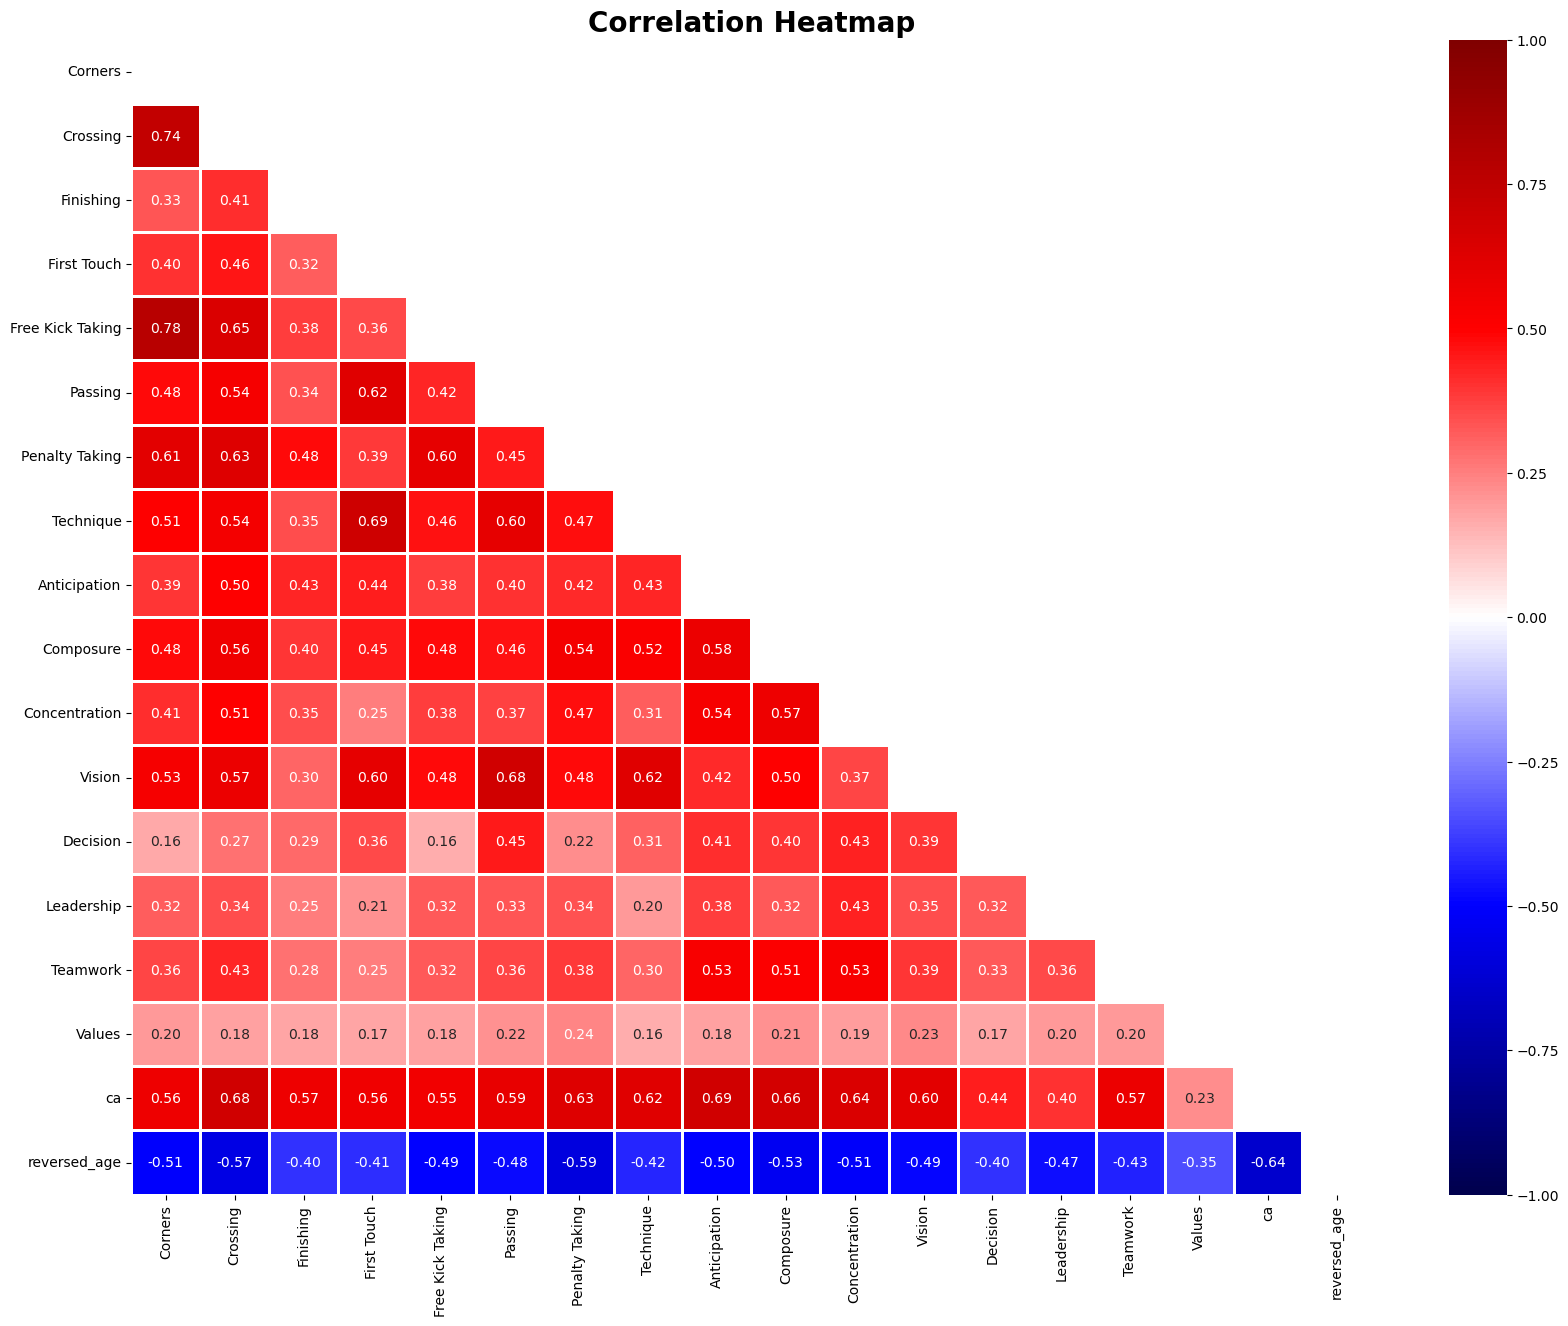

In [36]:

fig = plt.figure(figsize=[20,15])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')

Split

Feature Selection

In [82]:
""" 
# Assuming df is your DataFrame
max_age = amr_df['Age'].max()
amr_df['reversed_age'] = max_age - amr_df['Age']
amr_df.drop(columns=['Age'], inplace=True)
 """

" \n# Assuming df is your DataFrame\nmax_age = amr_df['Age'].max()\namr_df['reversed_age'] = max_age - amr_df['Age']\namr_df.drop(columns=['Age'], inplace=True)\n "

In [83]:
#y_log = np.log10(y_train)


In [37]:
X = amr_df2.copy()
values = X.pop("Values")
y = np.log10(values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Selection - Variance

In [38]:
range_var_df = (pd.DataFrame({
                'Range': X_train.max() - X_train.min(),
                'Variance': X_train.var()})
                .sort_values(by='Variance'))

In [39]:
range_var_df.head()

,Range,Variance
First Touch,13,2.775818
Technique,13,2.877767
Passing,12,2.904863
Vision,13,3.446687
Decision,13,3.673424


In [40]:
range_var_df.tail()

,Range,Variance
Free Kick Taking,15,7.725811
Leadership,17,10.471399
Penalty Taking,18,10.610416
reversed_age,26,29.478594
ca,134,365.558969


In [ ]:
""" from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing
import time

# Assuming you have X_train, y_train defined somewhere

param_grid_rf = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10]
}
param_grid_knn = {
    "classifier__n_neighbors": list(range(3, 30)),
    "classifier__weights": ['uniform', 'distance'],
    "classifier__p": [1, 2]
}
param_grid_svm = {
    "classifier__C": [0.1, 1, 10],
    "classifier__epsilon": [0.1, 0.01, 0.001],
    "classifier__kernel": ["linear", "rbf", "poly"]
}

param_grid_dt = {
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10]
}

param_grid_lr = {
    # Add linear regression parameters if needed
}

param_grid_gb = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7]
}

# List of classifiers and their corresponding parameter grids
classifiers = [
    SVR(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    GradientBoostingRegressor()
]

param_grids = [
    param_grid_svm,
    param_grid_rf,
    param_grid_knn,
    param_grid_dt,
    param_grid_lr,
    param_grid_gb
]

best_classifier = None
best_score = float('-inf')  # Initialize with a very low value

# Perform RandomizedSearchCV for each classifier
for classifier, param_grid in zip(classifiers, param_grids):
    start_time = time.time()

    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('classifier', classifier)
    ])

    search = RandomizedSearchCV(
        model_pipeline,
        param_grid,
        n_iter=50,
        cv=5,
        random_state=123,
        n_jobs=multiprocessing.cpu_count() - 1
    )
    search.fit(X_train, y_train)

    if search.best_score_ > best_score:
        best_score = search.best_score_
        best_classifier = classifier.__class__.__name__

# Print the best classifier and its best score
print(f"Best Classifier: {best_classifier}")
print(f"Best Score: {best_score}")
 """

In [41]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import multiprocessing
import time

param_grid_rf = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10]
}
param_grid_knn = {
    "classifier__n_neighbors": list(range(3, 30)),
    "classifier__weights": ['uniform', 'distance'],
    "classifier__p": [1, 2]
}
param_grid_svm = {
    "classifier__C": [0.1, 1, 10],
    "classifier__epsilon": [0.1, 0.01, 0.001],
    "classifier__kernel": ["linear", "rbf", "poly"]  # You can try different kernels
}

# List of classifiers and their corresponding parameter grids
classifiers = [
    SVR(),
    RandomForestRegressor(),
    KNeighborsRegressor()
]


param_grids = [
     param_grid_svm,
     param_grid_rf,
     param_grid_knn
   
]


best_classifier = None
best_score = float('-inf')  # Initialize with a very low value

# Perform GridSearchCV for each classifier
for classifier, param_grid in zip(classifiers, param_grids):
    start_time = time.time()

    model_pipeline = Pipeline([
        #('branches', branches),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('classifier', classifier)
    ])

    """ neigh_search = GridSearchCV(
        model_pipeline,
        param_grid,
        cv=5,
        verbose=1,
        n_jobs=multiprocessing.cpu_count() - 1
    ) """
    neigh_search = RandomizedSearchCV(model_pipeline,
                                   param_grid,
                                   n_iter=50,
                                   cv=5,
                                   random_state=123,
                                   n_jobs=multiprocessing.cpu_count() - 1)
    neigh_search.fit(X_train, y_train)

    if neigh_search.best_score_ > best_score:
        best_score = neigh_search.best_score_
        best_classifier = classifier.__class__.__name__

# Print the best classifier and its best score
print(f"Best Classifier: {best_classifier}")
print(f"Best Score: {best_score}")

/Users/rafa/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


/Users/rafa/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Classifier: KNeighborsRegressor
Best Score: 0.09692609017149341


ML

In [89]:
""" from xgboost import XGBRegressor

model_pipeline = make_pipeline(#StandardScaler(), 
                               XGBRegressor(random_state=123))
#y_scaler = StandardScaler()
#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

param_grid = {"xgbregressor__n_estimators": [100, 500, 1000],
              "xgbregressor__max_depth": [3, 5, 7],
              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}

xgb_search = RandomizedSearchCV(model_pipeline,
                                param_grid,
                                scoring="neg_mean_absolute_percentage_error",
                                n_iter=50,
                                cv=5,
                                n_jobs=-1,
                                random_state=123)

xgb_search.fit(X_train, y_train)

best_score_search_xgb = xgb_search.best_score_

print(f"{best_score_search_xgb} MAPE")
 """

' from xgboost import XGBRegressor\n\nmodel_pipeline = make_pipeline(#StandardScaler(), \n                               XGBRegressor(random_state=123))\n#y_scaler = StandardScaler()\n#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()\n\nparam_grid = {"xgbregressor__n_estimators": [100, 500, 1000],\n              "xgbregressor__max_depth": [3, 5, 7],\n              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}\n\nxgb_search = RandomizedSearchCV(model_pipeline,\n                                param_grid,\n                                scoring="neg_mean_absolute_percentage_error",\n                                n_iter=50,\n                                cv=5,\n                                n_jobs=-1,\n                                random_state=123)\n\nxgb_search.fit(X_train, y_train)\n\nbest_score_search_xgb = xgb_search.best_score_\n\nprint(f"{best_score_search_xgb} MAPE")\n '

Metric

In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [47]:
dt_predictions = neigh_search.predict(X_test)

In [43]:
amr_df2_predict.drop("Values",inplace=True,axis=1)

KeyError: "['Values'] not found in axis"

In [44]:
dt_predictions_50 = neigh_search.predict(amr_df2_predict)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Acceleration
- Aggressiion
- Agility
- Balance
- Bravery
- ...
Feature names seen at fit time, yet now missing:
- ca


In [45]:
dt_predictions_50=10**dt_predictions_50

NameError: name 'dt_predictions_50' is not defined

In [92]:
#tree_predict = tree.predict(X_test)

In [50]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

In [51]:
pd.DataFrame({"MAE": [dt_mae],
              "RMSE": [dt_rmse],
              "MAPE": [dt_mape],
              "R2": [dt_r2]},
             index=["knn"])

,MAE,RMSE,MAPE,R2
knn,0.575894,0.759499,0.084605,0.089575


In [95]:
""" dt_mae = mean_absolute_error(y_true = y_test, y_pred = tree_predict)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = tree_predict, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = tree_predict)
dt_r2 = r2_score(y_true = y_test, y_pred = tree_predict) """

' dt_mae = mean_absolute_error(y_true = y_test, y_pred = tree_predict)\ndt_rmse = mean_squared_error(y_true = y_test, y_pred = tree_predict, squared=False)\ndt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = tree_predict)\ndt_r2 = r2_score(y_true = y_test, y_pred = tree_predict) '

In [96]:
""" pd.DataFrame({"MAE": [dt_mae],
              "RMSE": [dt_rmse],
              "MAPE": [dt_mape],
              "R2": [dt_r2]},
             index=["tree"]) """

' pd.DataFrame({"MAE": [dt_mae],\n              "RMSE": [dt_rmse],\n              "MAPE": [dt_mape],\n              "R2": [dt_r2]},\n             index=["tree"]) '

In [97]:
#amr_df['predicted_values'] = xgb_search.predict(amr_df.loc[:,cols])


In [98]:
#xgb_search

In [52]:
10**dt_predictions

array([ 6525352.35067973,  2606836.24776227,  3702123.89582485,
        6283582.06293599,  5129682.89424123,  4205932.81534151,
        3742736.93701462,  9561599.60084561,  3851557.72795806,
       14975874.43300704,  3971673.04231985,  8461752.56356471,
        3275404.60067643,  2287992.28704951,  3734144.68882058,
        4550034.91698479,  5919366.48470941,  8274078.38522123,
        3290289.0310721 ,  2712019.98981321,  8364315.45917913,
        8267696.15522814, 10289227.30352066,  3822682.61383082,
       25686820.19781777,  4535919.14403826,  8023291.2741017 ,
        6875029.19553932,  2792247.50482719,  9826385.48393225,
        2388188.82325653,  6095274.92816629, 11780337.20221169,
        6032031.9261295 ,  4658985.67668354,  4605613.62839802,
        3267622.13045653,  6495232.07977615,  6179204.54220409,
        5987868.0669158 ,  8412207.20132393,  7584584.55950928,
        7889179.4121659 ,  5628213.21448545,  4353663.32034041,
        3089316.59182438,  3870935.69303

In [53]:

# Create a new DataFrame for predictions and actual values
results_df = pd.DataFrame({'Predicted Market Value tree': 10**dt_predictions ,
                           'Actual Market Value': 10**y_test}).sort_values(by='Actual Market Value', ascending=False)

In [54]:
results_df.round(2)

,Predicted Market Value tree,Actual Market Value
63,17483692.95,347975206.0
445,6337318.94,347975206.0
81,17118803.62,347975206.0
2,40953501.17,347975206.0
656,8935397.45,347975206.0
...,...,...
168,20765920.44,285158.0
434,7616120.72,169558.0
192,8267696.16,126969.0
620,3797997.48,75598.0


In [102]:
results_df2 = results_df.merge(amr_df, how='left', left_index=True, right_index=True)


In [ ]:
results_df2 = results_df.merge(amr_df, how='left', left_index=True, right_index=True)


In [135]:
df_predict_og

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,Current reputation,Domestic reputation,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,16,16,17,6,17,7,9,18,16,9,18,12,14,13,15,15,20,18,17,16,13,14,11,14,15,15,13,14,10,16,14,17,13,15,6,15,7,14,1,3,1,3,3,3,3,3,3,2,1,13,17,13,14,11,18,16,13,1,1,1,1,1,1,12,15,20,15,14,20,14,12,181,68,16,20,347975206,9450,9400,9400,Northern_European,181,4,1991/6/28,91,24,394372.0,NaN,18004457
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,17,18,12,7,13,4,4,15,18,4,17,6,17,12,18,14,15,15,15,18,13,18,3,10,10,20,16,15,8,15,20,14,11,15,7,16,7,14,2,2,2,1,1,2,1,3,2,1,2,15,20,8,14,16,16,12,13,1,1,1,1,1,1,1,10,1,10,19,1,17,20,178,73,10,20,347975206,9398,9398,9248,African_Caribbean,172,13,1998/12/20,57,27,1035616.0,NaN,85139014
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,19,18,15,17,12,3,7,13,20,7,16,15,19,16,17,17,13,17,20,14,15,19,7,12,12,14,13,19,15,20,14,18,16,18,8,15,2,8,2,2,3,2,3,2,3,3,2,1,1,15,20,15,10,16,18,10,11,1,1,1,1,1,1,1,1,1,1,10,12,8,20,185,81,13,20,347975206,9300,9400,9250,Northern_European,183,3,1988/8/21,132,76,345204.0,NaN,719601
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,18,16,13,15,13,5,6,13,17,7,15,13,18,15,18,15,14,13,20,16,13,18,7,13,13,17,16,17,18,19,19,14,17,17,9,17,12,10,2,4,1,3,2,2,2,2,3,3,2,16,20,12,15,18,17,10,12,1,1,1,1,1,1,1,1,1,1,1,1,1,20,195,88,20,11,347975206,9250,9250,8750,Northern_European,185,2,2000/7/21,21,20,394372.0,NaN,29179241
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,17,17,12,10,13,6,7,15,17,7,17,11,16,11,15,15,17,15,18,15,11,18,9,15,16,18,16,18,8,17,18,15,15,15,6,16,4,7,3,2,2,1,2,1,3,2,3,3,2,16,19,8,13,16,18,16,17,1,1,1,1,1,1,1,1,1,1,17,12,20,19,175,72,20,8,347975206,9400,9445,8750,North_African__Middle_Eastern,181,9,1992/6/15,85,47,405971.0,NaN,98028755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,Yin Hongbo,AM RLC,32,97,108,China PR,Meizhou Hakka,11,10,12,10,10,11,8,10,7,2,13,10,3,13,11,10,8,11,9,12,12,13,14,9,12,10,12,12,12,13,6,8,8,13,10,8,11,6,9,11,10,2,1,1,1,3,2,3,1,3,1,1,14,13,1,10,12,14,10,11,1,1,1,1,1,1,9,15,15,12,18,20,16,1,180,65,20,10,347975206,4736,4763,2084,10,96,7,1989/10/30,14,1,5883.0,NaN,23034722
7475,Peng Xinli,M/AM C,31,96,108,China PR,Shanghai Shenhua,11,9,11,9,11,11,9,10,7,7,11,9,8,12,10,9,10,12,11,11,10,12,15,6,10,11,11,10,10,11,9,8,13,10,12,8,16,11,12,8,13,3,3,1,3,1,2,3,3,1,3,1,12,15,7,10,12,9,11,18,1,1,11,1,1,1,15,14,19,1,1,20,1,1,176,62,20,15,347975206,4743,4743,1948,10,91,5,1991/7/22,2,0,7354.0,NaN,23051475
7589,Yu Hanchao,M/AM RL,35,94,116,China PR,Shanghai Shenhua,11,11,13,9,9,10,7,11,7,4,11,12,7,12,13,12,14,8,10,13,12,17,12,8,15,10,8,14,12,12,11,9,8,13,9,8,12,9,9,12,12,1,1,1,2,3,1,2,1,4,1,2,8,15,3,12,10,14,8,11,1,1,1

In [138]:
dt_predictions_50

array([17877446.85550383, 11002267.51245494,  6536578.88426613,
        8770522.61621355,  5852031.50598616, 11106850.92966532,
        9199729.61177647, 11070591.94287155,  6886850.3702456 ,
       15478784.69547882, 12052637.61245925,  9985253.97350013,
       10095137.6887552 ,  9089102.92648378,  8123253.33373279,
        3565980.1958829 ,  8537270.08460069,  8828985.61835726,
       13680350.5697127 ,  8688466.5773772 , 14911163.90176931,
        5963175.9235252 ,  5833735.63028562,  4696056.6078899 ,
        8464014.28768881, 10318464.86456178,  5290336.82015338,
        3222588.93675068,  8232154.02632562,  7186116.39923995,
        4330960.25826732,  2818248.45263076,  1700989.26001753,
        7709275.94270655,  3035645.25257187,  4886813.52740825,
        1106675.59553874,  5943276.37902219,  1940609.92464323,
        4565730.30412278,  1434107.41019674,  1059944.60404121,
        1830780.97297893,  2995507.39714389,  2513992.31904974,
        1971658.5061761 ,   971221.59511

In [134]:
df_predict_og["values_predic+50"] = dt_predictions_50

ValueError: Length of values (93) does not match length of index (899)

In [ ]:
dt_predictions

In [103]:
amr_df2

,Heading,Long Shots,Marking,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Work Rate,Acceleration,Balance,Natural Fitness,Pace,Stability,Values,ca,reversed_age
0,13,17,4,14,13,17,11,14,4,12,14,18,10,12,13,20000000,160,13
1,7,13,7,14,9,15,8,15,8,14,15,15,12,14,14,36552285,154,11
2,7,11,4,16,15,15,6,14,6,14,13,17,14,14,14,35000000,153,19
3,6,14,5,15,16,16,16,14,8,12,15,16,12,15,12,43312502,153,12
4,8,14,6,14,14,14,8,15,10,13,15,14,13,15,13,34748999,153,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,7,6,7,12,17,15,7,11,8,13,10,8,14,10,20,8871048,68,25
702,1,10,1,5,4,18,4,8,3,9,11,9,14,10,6,9678350,66,25
703,7,7,5,13,14,13,4,10,5,7,7,6,14,7,10,2977776,65,24
704,4,4,5,12,3,14,2,10,5,9,12,5,14,12,6,8861769,60,24


In [104]:
results_df2.round(2).head(50)

,Predicted Market Value tree,Actual Market Value,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
521,8502815.88,48750001.0,Mohamed Taabouni,M/AM LC,20,106,-75,Feyenoord Rotterdam,11,11,14,11,13,12,4,11,3,5,13,12,5,14,10,12,11,12,8,14,10,14,15,5,11,6,8,9,13,15,12,6,12,12,11,6,9,7,13,4,11,1,2,3,1,1,3,3,2,1,4,3,13,11,5,10,10,11,11,10,1,1,1,1,1,1,1,18,19,12,18,20,12,1,178,67,10,20,48750001,37065532,AMC
76,2227349.51,41339997.0,Orkun Kökçü,M/AM C,21,135,155,Feyenoord Rotterdam,13,12,13,11,14,15,7,13,12,6,14,14,6,14,10,12,14,14,14,13,13,14,13,15,13,7,13,14,12,14,13,7,13,13,15,11,13,10,12,12,16,1,2,1,2,3,2,3,3,1,3,1,18,16,6,11,12,13,13,11,1,1,1,1,1,1,12,12,20,12,10,20,10,7,175,0,13,20,41339997,37061602,AMC
522,4169827.24,39300000.0,Lovro Zvonarek,M/AM RLC,17,105,-8,FC Bayern München,12,10,12,11,13,12,6,11,4,9,12,11,11,13,12,11,12,12,10,13,10,13,13,13,12,11,12,12,12,12,11,8,14,12,12,8,12,7,12,6,15,3,2,1,1,2,2,1,1,1,2,1,12,16,4,12,15,16,13,12,1,1,1,1,1,1,10,12,18,12,15,20,15,11,180,68,9,20,39300000,2000097325,AMC
668,4977168.54,35052702.0,Bobby Clark,AM RLC,17,81,-8,Liverpool,7,9,8,9,14,7,3,9,5,6,14,7,8,10,14,7,8,10,8,13,13,15,11,1,14,8,13,9,9,12,8,8,17,11,5,4,11,5,5,13,10,4,3,1,1,3,3,2,2,3,1,1,20,12,4,10,9,10,12,10,1,1,1,1,1,1,1,1,14,1,18,20,18,15,178,0,10,20,35052702,2000047196,AMC
2,14262606.91,35000000.0,Dejan Kulusevski,M/AM RC,22,153,171,Juventus,11,14,16,13,15,9,7,11,4,4,17,11,7,16,7,15,8,13,12,16,16,15,15,6,14,6,14,14,13,14,17,12,14,14,16,15,14,11,14,6,15,3,1,3,2,3,2,2,3,1,3,1,16,14,8,12,15,14,13,10,1,1,1,1,1,9,1,12,14,18,14,20,20,14,186,79,20,14,35000000,43295814,AMC
31,5763947.03,33405620.0,Donny van de Beek,M/AM C,25,142,160,Manchester UFC,13,13,13,14,15,13,11,13,8,10,15,11,11,15,10,13,12,14,14,15,12,15,13,13,15,9,16,17,11,14,13,13,15,12,15,10,12,6,11,3,15,3,3,3,3,3,1,2,1,2,1,3,8,14,4,14,13,15,15,11,1,1,1,1,1,1,14,1,19,1,1,20,1,1,184,67,12,20,33405620,37048153,AMC
545,5560088.94,33300000.0,Jevon Simons,AM RC,16,102,-85,PSV Eindhoven,8,11,13,11,13,8,8,10,8,7,14,12,10,13,9,10,14,10,11,14,12,15,10,9,14,5,7,12,11,16,13,9,13,11,9,7,9,8,19,5,8,3,3,4,2,2,1,1,2,1,2,3,15,13,2,10,11,10,13,17,1,1,1,1,1,1,1,1,13,13,1,20,19,12,180,0,10,20,33300000,2000122314,AMC
286,3398804.15,32477686.0,Aimar,AM LC,20,123,-85,Atlético Pamplona,11,13,14,11,15,9,6,10,3,6,15,14,9,15,6,8,11,14,12,14,14,14,16,10,9,11,13,12,13,14,10,6,10,13,12,10,11,9,11,8,14,3,3,3,1,3,2,1,2,2,1,1,7,13,7,10,11,10,12,19,1,1,1,1,1,1,1,1,14,1,18,20,14,1,177,70,10,20,32477686,67276375,AMC
10,6014319.55,32223212.0,Oscar,M/AM RC,30,148,175,Shanghai Port,9,14,14,12,14,13,8,13,9,10,15,12,13,16,12,14,12,14,13,16,12,12,16,8,17,14,15,15,13,15,9,9,18,14,15,8,10,6,12,7,13,2,3,3,3,1,1,1,2,1,3,1,11,14,10,7,8,12,12,14,1,1,1,1,1,1,5,14,18,13,14,20,15,1,181,71,12,20,32223212,19047778,AMC
525,4068034.54,29399999.0,Antoni Milambo,AM C,17,105,-85,Feyenoord Rotterdam,8,9,13,10,14,8,8,10,7,4,14,4,10,13,13,13,7,10,8,10,14,13,15,9,10,7,9,13,12,14,12,7,14,13,12,7,11,9,16,6,11,2,2,3,1,2,3,1,4,4,2,2,15,11,4,9,12,11,11,14,1,1,1,1,1,1,1,12,15,1,13,20,1,1,179,0,8,20,29399999,2000054475,AMC


In [105]:
results_df

,Predicted Market Value tree,Actual Market Value
521,8.502816e+06,48750001.0
76,2.227350e+06,41339997.0
522,4.169827e+06,39300000.0
668,4.977169e+06,35052702.0
2,1.426261e+07,35000000.0
...,...,...
257,4.890030e+06,172818.0
294,1.421643e+06,145343.0
211,1.408138e+06,129622.0
548,6.390392e+06,75598.0


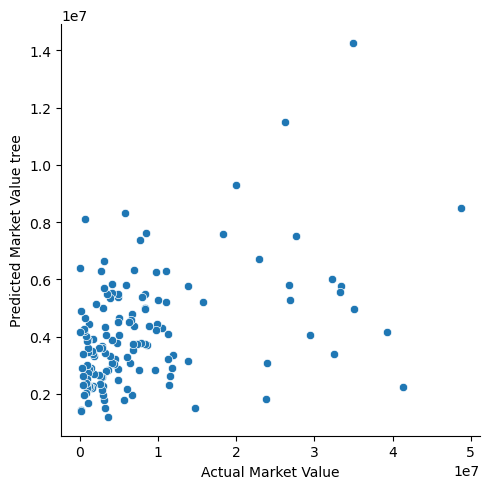

In [106]:
sns.relplot(data=results_df,x='Actual Market Value',y='Predicted Market Value tree')